## Intro to Machine Learning Part 1

This workshop will guide you through the basics of using supervised machine learning techniques using the __pandas__ and __scikit-learn__ libraries. The focus of this workshop is not to guide you through the specifics of manipulating your data at each step but to provide a high-level overview of what you need to do to create a simple regression or classification model.

The slides to the workshop can be found [here](https://tinyurl.com/cads-ml-intro).

#### Terms You Need to Know
- Data Set
- Feature
- Tidy data
- Impute
- Scaling
- Standardize
- Normalize
- Model
- Training Data Set
- Testing Data Set
- Hyperparameters
- Supervised Learning
- Cross Validation
- Metric
- Overfitting

#### Pipeline
Here are steps that are commonly taken by data scientists and ML engineers for their machine learning projects. At each step, there are questions to consider when constructing your pipeline. This guide will still be used as a basis, however, we will not go into the specifics at each step. I strongly encourage you to research each step to improve your own pipelines.

![Questions to ask for your ML pipeline](pipeline.png)

### Data Collection

In [11]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Classification

The goal of classification is to predict discrete values. The common classification algorithms are:
- Logistic Regression
- Naive Bayes Classifier
- Support Vector Machines
- Decision Trees
- K-Nearest Neighbor
- Random Forest

##### Logistic Regression

https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [29]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
# extract features to train model
X = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
        'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetes[['Outcome']]

# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
# fit training data to model and adjust any hyperparameters
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train, y_train)

# get your prediction and run metrics on it
y_hat = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       123
           1       0.61      0.64      0.62        69

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.73       192



/Users/hamzah/Workspace/.virtualenvs/ds/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [44]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cnf_matrix = confusion_matrix(y_test, y_hat)
print(cnf_matrix)

# additional metrics
print("Accuracy:", accuracy_score(y_test, y_hat))
print("Precision:", precision_score(y_test, y_hat))
print("Recall:", recall_score(y_test, y_hat))

[[95 28]
 [25 44]]
Accuracy: 0.7239583333333334
Precision: 0.6111111111111112
Recall: 0.6376811594202898


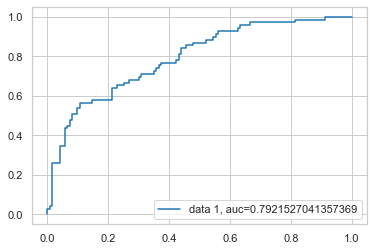

In [48]:
# ROC-AUC curve
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Regression

The goal of regression is to predict continuous values. The common regression algorithms are:
- Linear Regression
- Polynomial Regression
- Poisson Regression

##### Linear Regression